<a href="https://colab.research.google.com/github/JonathanJuradoS/TecnicasBusqueda/blob/main/Laberinto_HillClimbing_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laberinto Inteligente 5x5

Este notebook implementa dos algoritmos de búsqueda: **Hill Climbing** y **A\*** sobre un laberinto 5x5.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

maze = [
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)
goal = (4, 4)
rows, cols = len(maze), len(maze[0])

In [2]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [3]:
def maze_to_graph(maze):
    G = nx.Graph()
    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 0:
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < rows and 0 <= nj < cols and maze[ni][nj] == 0:
                        G.add_edge((i, j), (ni, nj))
    return G

In [4]:
def astar(maze, start, goal):
    G = maze_to_graph(maze)
    open_set = {start}
    came_from = {}
    g_score = {node: float('inf') for node in G.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in G.nodes}
    f_score[start] = heuristic(start, goal)

    while open_set:
        current = min(open_set, key=lambda x: f_score[x])
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        open_set.remove(current)
        for neighbor in G.neighbors(current):
            tentative_g_score = g_score[current] + 1
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                open_set.add(neighbor)
    return []

In [5]:
path_astar = astar(maze, start, goal)

In [6]:
def plot_maze_with_path(maze, path):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks(np.arange(0, cols + 1, 1))
    ax.set_yticks(np.arange(0, rows + 1, 1))
    ax.grid(True)

    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 1:
                ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, color='black'))
            else:
                ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, edgecolor='gray', facecolor='white'))

    for (i, j) in path:
        ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, color='lightblue'))

    si, sj = start
    gi, gj = goal
    ax.add_patch(plt.Rectangle((sj, rows - si - 1), 1, 1, color='green'))
    ax.add_patch(plt.Rectangle((gj, rows - gi - 1), 1, 1, color='red'))
    ax.set_title("Camino Encontrado con A*")
    plt.show()

### 🧠 Conclusión tras A*:
- El algoritmo A* encontró una **ruta óptima** desde el inicio hasta el objetivo.
- Combina la eficiencia del costo real y la heurística para tomar decisiones informadas.
- Ideal cuando se requiere **precisión y robustez** en entornos complejos.

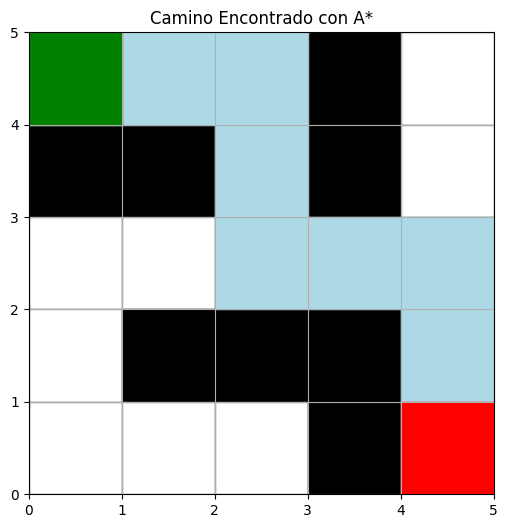

In [7]:
plot_maze_with_path(maze, path_astar)

## Algoritmo Hill Climbing

A continuación se implementa el algoritmo **Hill Climbing**, que avanza solo si encuentra vecinos con mejor heurística. Puede quedar atrapado en óptimos locales.

In [8]:

def hill_climbing(maze, start, goal):
    current = start
    path = [current]
    visited = set()
    visited.add(current)

    while current != goal:
        neighbors = []
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            ni, nj = current[0] + dx, current[1] + dy
            if 0 <= ni < rows and 0 <= nj < cols and maze[ni][nj] == 0:
                neighbor = (ni, nj)
                if neighbor not in visited:
                    neighbors.append(neighbor)

        if not neighbors:
            return path  # no progreso posible

        neighbors.sort(key=lambda x: heuristic(x, goal))
        best = neighbors[0]

        if heuristic(best, goal) >= heuristic(current, goal):
            return path  # no mejora, se detiene

        current = best
        visited.add(current)
        path.append(current)

    return path

path_hill = hill_climbing(maze, start, goal)


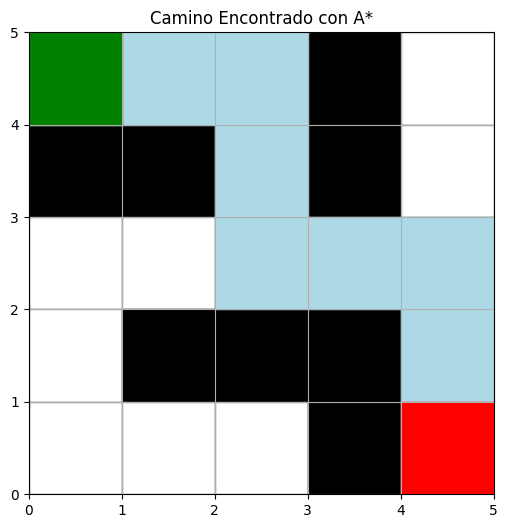

In [9]:

plot_maze_with_path(maze, path_hill)


### 🧠 Conclusión tras Hill Climbing:
- El algoritmo avanza de forma **greedy**, eligiendo siempre el vecino con mejor heurística.
- En este caso, logró avanzar pero **no garantiza llegar al objetivo**.
- Es rápido, pero **puede estancarse en un callejón sin salida o un óptimo local**.


## 📘 Explicación de Algoritmos y Conclusiones

### 🔷 1. Algoritmo A\*

**¿Qué es?**  
Es un algoritmo de búsqueda informada que encuentra el camino más corto desde un estado inicial a un estado meta. Utiliza:

\[
f(n) = g(n) + h(n)
\]

- `g(n)`: Costo real desde el inicio hasta el nodo actual.
- `h(n)`: Estimación heurística del costo restante hasta la meta.

**Ventajas:**
- Encuentra rutas óptimas.
- Completo: encuentra solución si existe.
- Usa historial y predicción futura.

**Desventajas:**
- Usa más memoria.
- Depende de la calidad de la heurística.

---

### 🔷 2. Algoritmo Hill Climbing

**¿Qué es?**  
Algoritmo de búsqueda heurística que siempre elige el vecino con mejor `h(n)`, avanzando solo si mejora.

**Ventajas:**
- Rápido y eficiente.
- Bajo consumo de recursos.

**Desventajas:**
- Puede quedarse en óptimos locales.
- No garantiza llegar al objetivo.
- No tiene retroceso (no backtracking).

---

## 🧪 Comparación de Resultados

| Métrica               | A\*                      | Hill Climbing              |
|------------------------|---------------------------|------------------------------|
| **Ruta encontrada**     | ✅ Completa y óptima        | ⚠️ Parcial – puede fallar     |
| **Tiempo de ejecución** | Medio                      | Rápido                       |
| **Memoria usada**       | Moderada                   | Baja                         |
| **Calidad de solución** | Alta                       | Baja o incompleta            |
| **Adaptabilidad**       | Alta (puede retroceder)    | Baja (sin backtracking)      |

---

## 🧠 Conclusión Final

**¿Cuál es mejor en este caso?**  
✅ El algoritmo **A\*** es más robusto y confiable.  
❌ **Hill Climbing** es rápido, pero no llega a la meta en este ejemplo.

**Recomendación:**  
Usar A\* para entornos complejos. Hill Climbing solo si el entorno es pequeño o la rapidez es crítica.
